In [491]:
#подключаем необходимые библиотеки
import numpy as np
import pandas as pd
import seaborn
from numpy import argmax
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.cross_validation import cross_val_score
plt.rcParams["figure.figsize"] = (9,9)


## В данном файле представлено решение задачи многоклассовой классификации: распознование британских гласных по данным с динамиков

### Считываем данные

In [492]:
data = pd.read_csv("vowel.scale.txt", sep = "\s+ | |:", header = None, engine = 'python')

In [493]:
data = data.iloc[:,[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]]
data.columns = ['vowel_number', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [494]:
data

,vowel_number,1,2,3,4,5,6,7,8,9,10
0,0,-0.263700,-0.466919,-0.068205,0.771111,-0.010106,0.557382,-0.218367,0.228591,-0.494182,-0.436931
1,1,-0.117564,-0.442344,-0.080513,0.541111,-0.059121,0.750869,-0.201361,0.215779,-0.321013,-0.224967
2,2,0.447775,-0.316950,-0.532821,-0.135556,-0.282466,0.514385,-0.348299,0.327714,-0.449692,0.060468
3,3,0.369555,-0.028670,-0.492821,0.345000,-0.457302,0.198862,-0.340136,0.030344,0.041752,-0.424577
4,4,0.223888,0.011972,-0.158462,0.372778,-0.750379,0.011698,0.313605,-0.229265,0.293634,-0.165150
5,5,0.104918,0.004411,-0.111795,0.241111,-0.727640,0.069238,0.193197,-0.293999,0.266940,-0.144993
6,6,-0.190164,0.196597,0.053333,0.365000,-0.933300,0.098957,0.264626,0.175320,0.362081,-0.145644
7,7,-0.405152,0.127599,0.338974,0.766667,-0.842345,-0.096427,-0.250340,0.540796,0.497604,-0.103381
8,8,-0.367213,0.068053,-0.206154,0.165000,-0.266296,0.590262,-0.302721,0.497640,-0.010267,-0.189857
9,9,-0.267916,-0.027725,-0.431282,0.659444,0.107630,0.525767,-0.271429,0.345246,0.145106,-0.451235


### Перемешиваем данные для обучения модели

In [495]:
shuffle_data = shuffle(data)
shuffle_data.head()

,vowel_number,1,2,3,4,5,6,7,8,9,10
261,8,-0.079625,-0.374291,0.475385,0.238333,-0.608388,0.207714,0.179592,0.449764,0.065708,0.407672
276,1,-0.069321,-0.445180,0.696923,0.518333,0.455280,-0.248814,-0.618367,-0.507080,-0.230664,0.204161
514,8,-0.742389,0.735665,0.020513,-0.784444,0.223850,-0.182422,0.032653,0.104518,-0.823409,0.132640
392,7,-0.468384,0.452426,-0.077436,0.158889,-0.669025,-0.179893,0.509524,0.360081,0.594798,-0.173602
435,6,0.072131,0.227158,0.385128,-0.149444,-0.671551,-0.580778,0.076190,0.802428,-0.330595,-0.399870


### Сохраняем данные для обучения в переменную fit_data а ответы в answers

In [496]:
fit_data = shuffle_data.iloc[:,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
fit_data.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
answers = shuffle_data.iloc[:, 0]

### Создаем модель решающего дерева и обучаем ее на $k = \frac{4}{5}$ наших данных

In [497]:
k = 4./5
fit_size = int(len(answers) * k)
model = tree.DecisionTreeClassifier()
model.fit(fit_data.iloc[:fit_size], answers.iloc[:fit_size])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Считаем долю правильных ответов модели на тестовой выборке

In [498]:
def accuracy(prediction, answer):
    i = 0.
    for x, y in zip(prediction, answer):
        if(x == y):
            i += 1
    return i / (len(answer))

accuracy(model.predict(fit_data.iloc[fit_size:]), answers.iloc[fit_size:])

0.7641509433962265

### Находим параметры модели, при которых достигается наибольшая точность

In [499]:
scores = []
depth = []
features = []
for d in range (1, 101):
    for f in range (1, 11):
        model = tree.DecisionTreeClassifier(max_depth = d, max_features = f)
        model.fit(fit_data.iloc[:fit_size], answers.iloc[:fit_size])
        scores.append(accuracy(model.predict(fit_data.iloc[fit_size:]), answers.iloc[fit_size:]))
        depth.append(d)
        features.append(f)
print 'max_score:', scores[argmax(scores)], 'optimal_depth:', depth[argmax(scores)], 'optimal_number_of_features:', features[argmax(scores)]

max_score: 0.858490566038 optimal_depth: 50 optimal_number_of_features: 8


### Визуализируем зависимость качества модели от данных параметров

Text(0.5,0,u'depth')

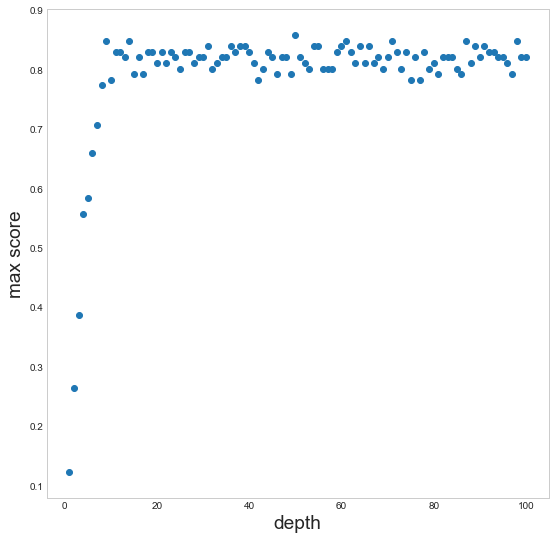

In [500]:
max_score = []

for i in range(1, 101):
    m = 0
    for j in range(0, len(scores)):
        if(scores[j] > m and depth[j] == i):
            m = scores[j]
    max_score.append(m)  
    
plt.scatter(range(1, 101), max_score)
plt.legend()
plt.ylabel('max score', fontsize=19)
plt.xlabel('depth', fontsize=19)

Text(0.5,0,u'number of features')

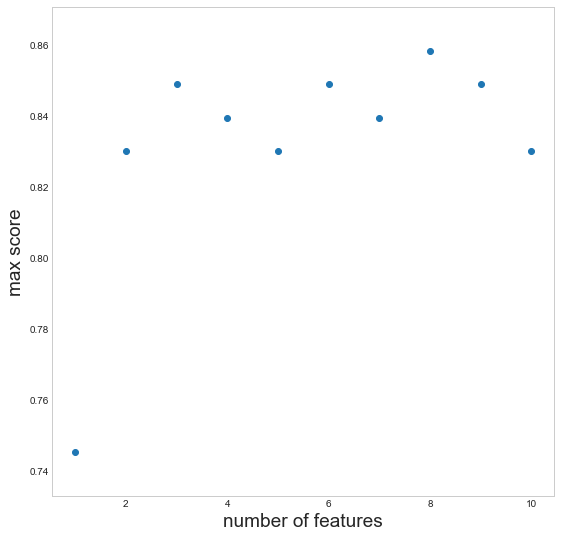

In [501]:
max_score = []

for i in range(1, 11):
    m = 0
    for j in range(0, len(scores)):
        if(scores[j] > m and features[j] == i):
            m = scores[j]
    max_score.append(m)  
    
plt.scatter(range(1, 11), max_score)
plt.legend()
plt.ylabel('max score', fontsize=19)
plt.xlabel('number of features', fontsize=19)

### Создадим новую модель с оптимальными параметрами

In [502]:
model1 = tree.DecisionTreeClassifier(max_depth = depth[argmax(scores)], max_features = features[argmax(scores)])
model1.fit(fit_data.iloc[:fit_size], answers.iloc[:fit_size])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Функция Show(i, j) иллюстрирует проекцию данных на пару признаков (i, j)

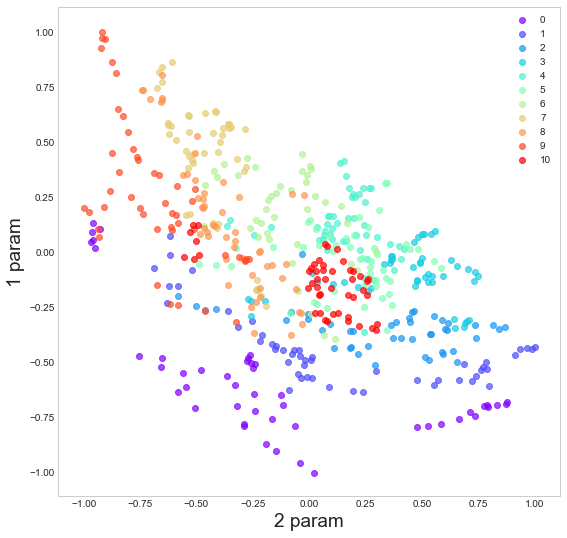

In [503]:
def Show(i, j):
    colors = cm.rainbow(np.linspace(0, 1, 11))
    predict = pd.DataFrame(model1.predict(fit_data))
    subset = pd.DataFrame(np.hstack((predict, fit_data.iloc[:,[i-1, j-1]])))
    for y, c in zip(range(0, 11), colors):
        plt.scatter(subset[subset[0] == y].iloc[:,[1]].dropna(), 
        subset[subset[0] == y].iloc[:,[2]].dropna(), 
        c = c, alpha = 0.7, label=str(y))
    plt.legend()
    plt.ylabel(str(i) + ' param', fontsize=19)
    plt.xlabel(str(j) + ' param', fontsize=19)
Show(1, 2)

### Реализуем метод понижения размерности MDS для получения более информативной визуализации

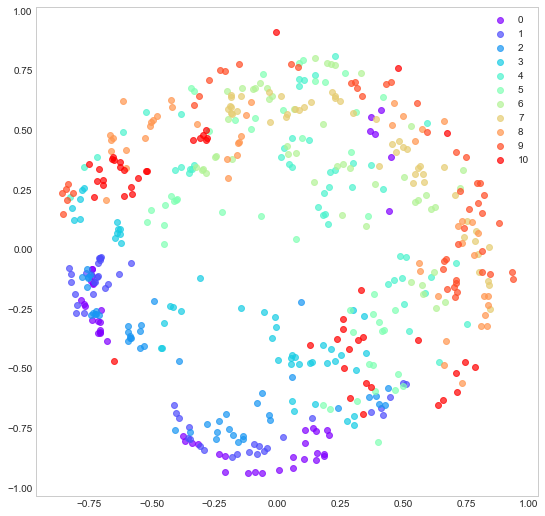

In [504]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances

subset_l  = 528
data_subset = fit_data[:subset_l]
response_subset = answers[:subset_l]

model2 = MDS(random_state = 7, dissimilarity = "precomputed")
mat_dist = pairwise_distances(data_subset, metric = 'cosine')
MDS_transformed_cos = model2.fit_transform(mat_dist) 

colors = cm.rainbow(np.linspace(0, 1, len(set(response_subset))))
for y, c in zip(set(response_subset), colors):
    plt.scatter(MDS_transformed_cos[response_subset.values == y, 0], 
                MDS_transformed_cos[response_subset.values == y, 1], 
                c=c, alpha=0.7, label=str(y))
plt.legend()

### Видно, что в выборке можно провести прямую, которая разделяет объекты классов (0 - 4) и (5 - 10)
### Предположительно, что это длинные и короткие гласные звуки английского языка соответсвенно